In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import colors
import os, copy
from PIL import Image

In [ ]:
# Function to initialize weights of linear layers with a normal distribution
def init_normal(m):
    if type(m) == nn.Linear:        
        nn.init.normal_(m.weight,  mean=0, std=0.5)


#generate image after training epoch and giving it a score using a recognition network


# Neural Network Architecture
        
class NN(nn.Module):

    def __init__(self, activation=nn.ReLU, num_neurons=16, num_layers=9):
        super(NN, self).__init__()

        # Define layers of the neural network
        layers = [nn.Linear(2, num_neurons, bias=True), activation()]
        for _ in range(num_layers - 1):
            layers += [nn.Linear(num_neurons, num_neurons, bias=False), activation()]
        layers += [nn.Linear(num_neurons, num_neurons, bias=False), nn.ELU()]
        layers += [nn.Linear(num_neurons, 3, bias=False), nn.Sigmoid()]
            
         # Create a sequential model with the defined layers
        self.layers = nn.Sequential(*layers)
  
    # Define the forward pass
    def forward(self, x):
        return self.layers(x)

# Function to generate a new image using the neural network
def gen_new_image(size_x, size_y, save=True, **kwargs):
    
     # Create an instance of the neural network
    net = NN(**kwargs)

        # Apply weight initialization to the network
    net.apply(init_normal)
       
        # Generate colors using the network
    colors = run_net(net, size_x, size_y)

        # Plot the generated colors
    plot_colors(colors)

          # Optionally save the colors as an image
    if save is True:
        save_colors(colors)
    return net, colors

# Function to run the neural network on a grid of colors to generate an image

def run_net(net, size_x=128, size_y=128, center=0.5):
    x = np.arange(0, size_x, 1)
    y = np.arange(0, size_y, 1)
    colors = np.zeros((size_x, size_y, 2))
       
        # Create a grid of colors
    for i in x:
        for j in y:
            colors[i][j] = np.array([float(i) / size_y - center, float(j) / size_x - center])
    colors = colors.reshape(size_x * size_y, 2)

        # Run the network on the colors to generate an image
    img = net(torch.tensor(colors).type(torch.FloatTensor)).detach().numpy()
    return img.reshape(size_x, size_y, 3)

       # Function to plot the generated colors
def plot_colors(colors, fig_size=4):
    plt.figure(figsize=(fig_size, fig_size))
    plt.imshow(colors, interpolation='nearest', vmin=0, vmax=1)

      # Function to save the generated colors as an image
def save_colors(colors):
    plt.imsave(str(np.random.randint(100000)) + ".png", colors)

      # Run Neural network, plot generated image, and save it
def run_plot_save(net, size_x, size_y, fig_size=8):
    colors = run_net(net, size_x, size_y)
    plot_colors(colors, fig_size)
    save_colors(colors)


#center, sizw_x, size_y, num_neurons, num_layers, activation


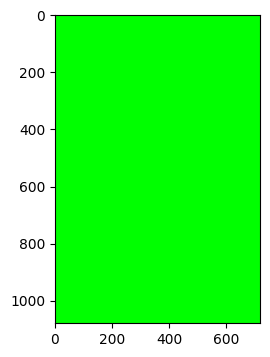

In [90]:
n,c = gen_new_image(1080, 720, save=False, num_neurons=32, num_layers=9)

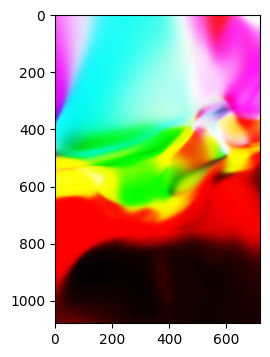

In [86]:
n1,c1=gen_new_image(1088, 720,save= False, num_neurons=40,  num_layers=6)